# Lesson 3: Visualizing Data - Widgets & Charts for EDA

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",25)
pd.set_option("display.max_rows",250)
pd.options.display.float_format = '{:,.2f}'.format

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
### Import the feather with our last completed dataset

path = 'C:/Users/marcusdeckert/Desktop/2024 RPM Python/'
data4 = pd.read_feather(path + 'data4.ftr')

In [3]:
### Make a copy that we can edit

data5 = data4.copy()

In [4]:
[i for i in data5.columns]

['pol_eff_year',
 'ep_bi',
 'ep_col',
 'ee_bi',
 'ee_col',
 'incloss_bi',
 'incloss_col',
 'cc_bi',
 'cc_col',
 'modelyear',
 'zip',
 'pol_id',
 'vin_id',
 'credit',
 'commute_flag',
 'veh_count_box',
 'driver_count_box',
 'veh_age_box',
 'coll_symb_ntile',
 'limit_bi',
 'ded_coll',
 'DrvAge_box',
 'male',
 'single',
 'widowed',
 'Date',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'police_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_f

In [ ]:
pip install matplotlib

<Axes: >

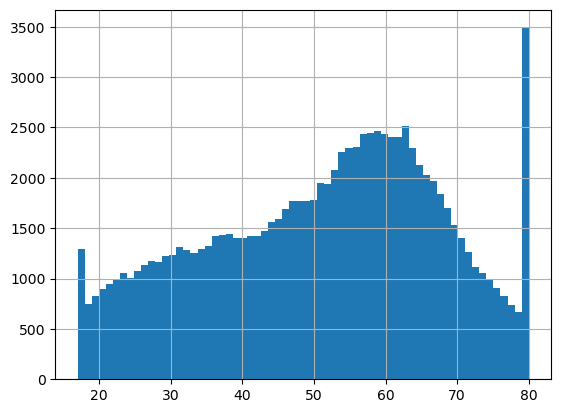

In [21]:
### Easy built in visualization for record count
data5['DrvAge_box'].hist(bins = 64)

## Make a chart to visually inspect the data

In [22]:
### Start with a basic one for a given field as input and bodily injury coverage

# Use our function from Lesson 2, removing 'col'
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi']
ee_list.remove('ee_col')

def eda_table(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()
    
    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()
        
    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]
        
    a.drop(columns = facts, inplace = True)  
    
    return a

b = eda_table(data5,'veh_count_box')
b

,veh_count_box,ee_bi_pct,avg_prem_bi,lr_bi,freq_bi,sev_bi,pp_bi
0,1,0.21,210.25,0.43,0.01,"10,863.91",89.69
1,2,0.39,154.86,0.62,0.01,"18,664.39",96.51
2,3,0.23,165.70,0.48,0.01,"13,992.41",79.62
3,4,0.17,183.68,0.80,0.00,"30,214.99",147.84


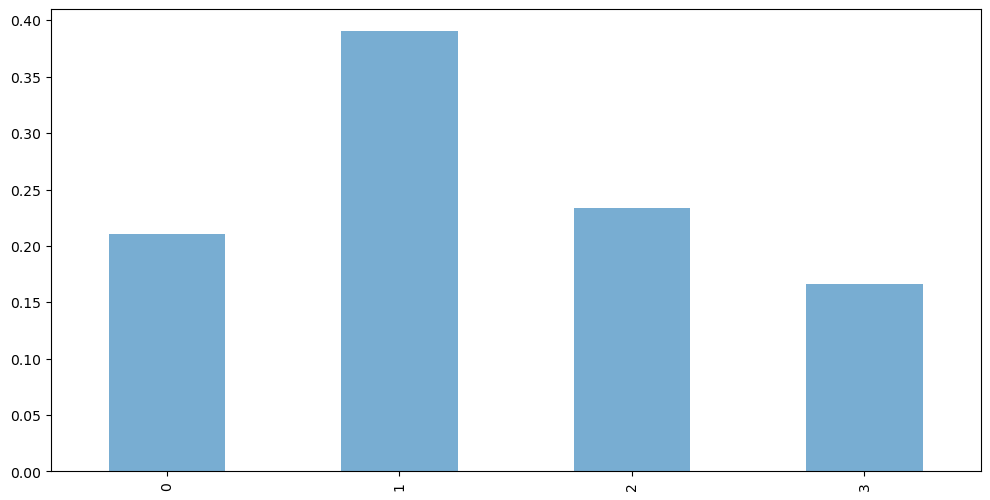

In [30]:
# Let's make a chart of exposures using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=.6)

plt.show()

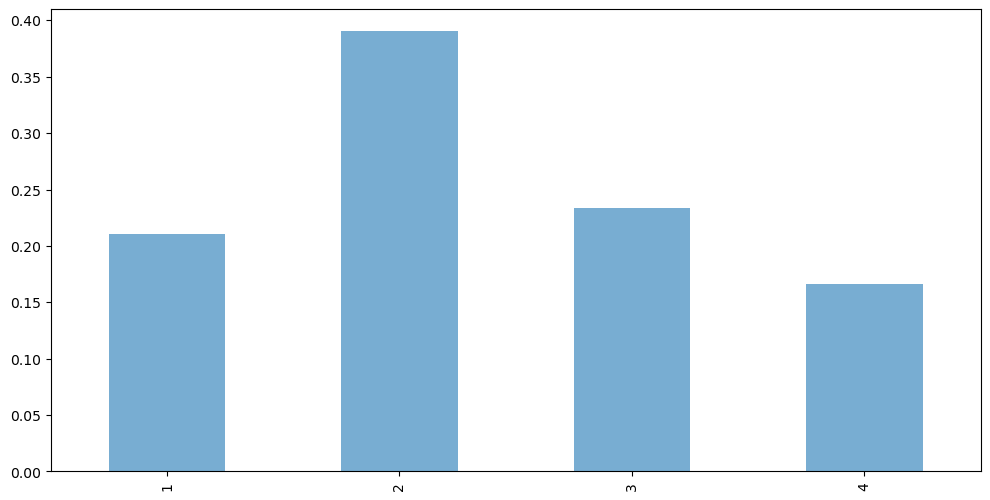

In [31]:
# Let's get the labels right

fig, ax = plt.subplots(figsize=(12,6))

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

plt.xticks(ticks = b.index, labels = b['veh_count_box']) ### Added

plt.show()

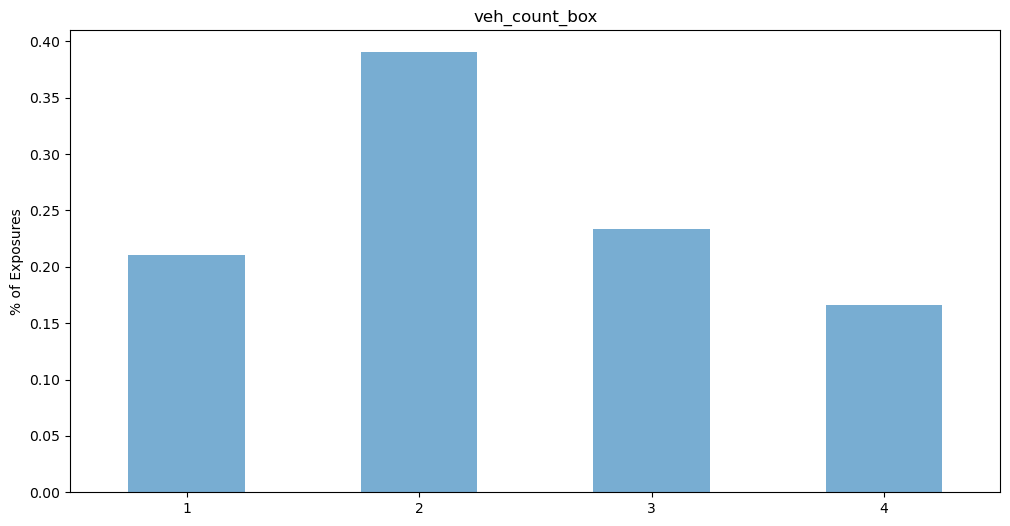

In [35]:
# Let's add y axis label and title

fig, ax = plt.subplots(figsize=(12,6))

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

plt.xticks(ticks = b.index, labels = b['veh_count_box'], rotation = 0)

ax.set(ylabel='% of Exposures', title = 'veh_count_box') ### Added

plt.show()

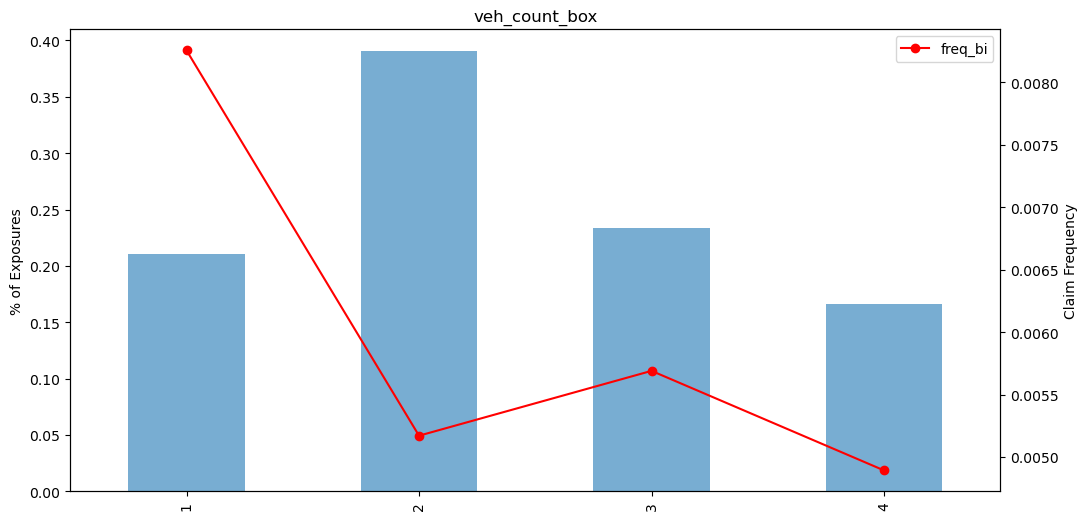

In [41]:
# Let's add frequency and put exposures on a 2nd axis

fig, ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx() ### 2nd axis

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)
b['freq_bi'].plot(kind='line', ax=ax2, marker='o', color = 'r', legend = '1') ### Added and changed to ax to ax2, added color, added legend item (legend text entered isn't utilized in the background)

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
ax2.set(ylabel='Claim Frequency') ### Added

plt.show()

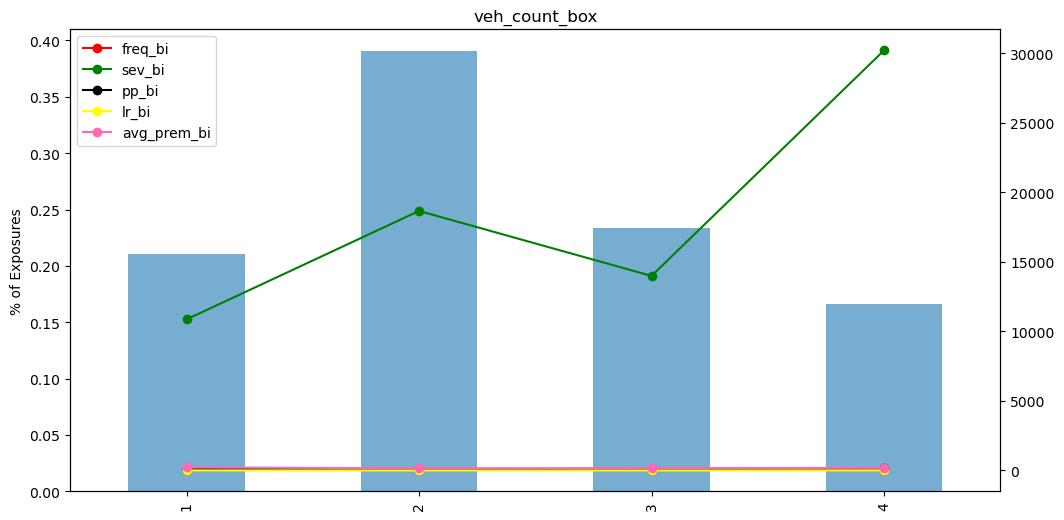

In [42]:
# Let's add all of the facts we want

fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)
b['freq_bi'].plot(kind='line', ax=ax2, marker='o', color = 'red', legend = '1')
b['sev_bi'].plot(kind='line', ax=ax2, marker='o', color = 'green', legend = '1')
b['pp_bi'].plot(kind='line', ax=ax2, marker='o', color = 'black', legend = '1')
b['lr_bi'].plot(kind='line', ax=ax2, marker='o', color = 'yellow', legend = '1')
b['avg_prem_bi'].plot(kind='line', ax=ax2, marker='o', color = 'hotpink', legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
# ax2.set(ylabel='Claim Frequency', title = 'veh_count_box') # removed

plt.show()

# colors: https://matplotlib.org/stable/gallery/color/named_colors.html

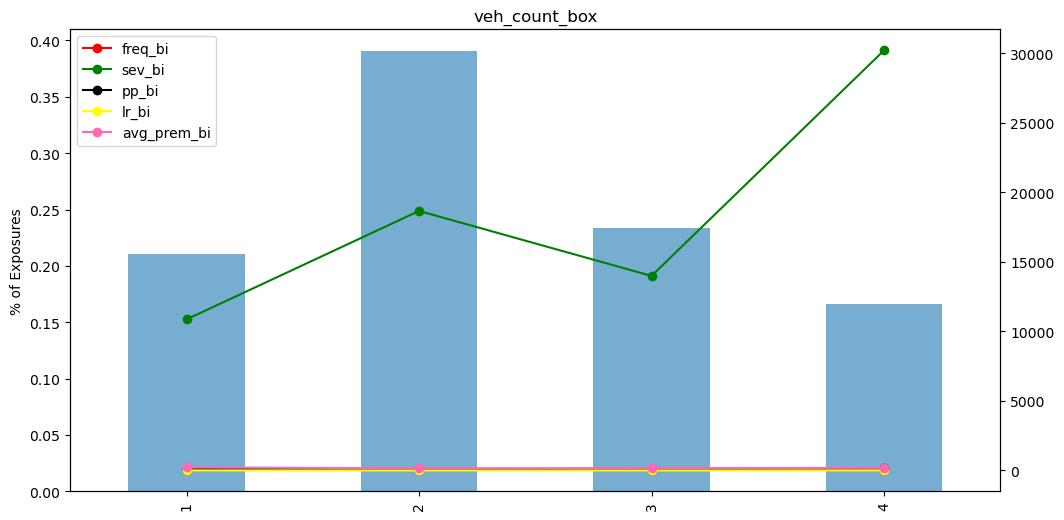

In [43]:
# Because the scales are all off, we need to rebase everything to the mean so we can look at everything at once
# First, this is getting to be too much code, let's refactor

fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

cov = 'bi'
metrics = ['freq_','sev_','pp_','lr_','avg_prem_']
colors = ['red','green','black','yellow','hotpink']

for i,m in enumerate(metrics):
    b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')

plt.show()

In [44]:
# Next, let's rework our EDA function to rebase all metrics to the mean for a relativity

facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi']
ee_list.remove('ee_col')

def eda_table(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()
    
    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()
        
    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]
        
    a.drop(columns = facts, inplace = True)
    
    metrics = ['freq','sev','pp','lr','avg_prem']
    for c in covs:
        a['avg_prem_rel_' + c] = a['avg_prem_' + c]  /(data['ep_' + c].sum()      /data['ee_' + c].sum())
        a['lr_rel_' + c]       = a['lr_' + c]        /(data['incloss_' + c].sum() /data['ep_' + c].sum())
        a['freq_rel_' + c]     = a['freq_' + c]      /(data['cc_' + c].sum()      /data['ee_' + c].sum())
        a['sev_rel_' + c]      = a['sev_' + c]       /(data['incloss_' + c].sum() /data['cc_' + c].sum())
        a['pp_rel_' + c]       = a['pp_' + c]        /(data['incloss_' + c].sum() /data['ee_' + c].sum())
                                                                             
    for c in covs:
        for m in metrics:
            del a[m + '_' + c]
    
    return a

b = eda_table(data5,'veh_count_box')
b

,veh_count_box,ee_bi_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi
0,1,0.21,1.21,0.74,1.40,0.64,0.90
1,2,0.39,0.89,1.09,0.88,1.10,0.97
2,3,0.23,0.95,0.84,0.97,0.83,0.80
3,4,0.17,1.06,1.40,0.83,1.79,1.48


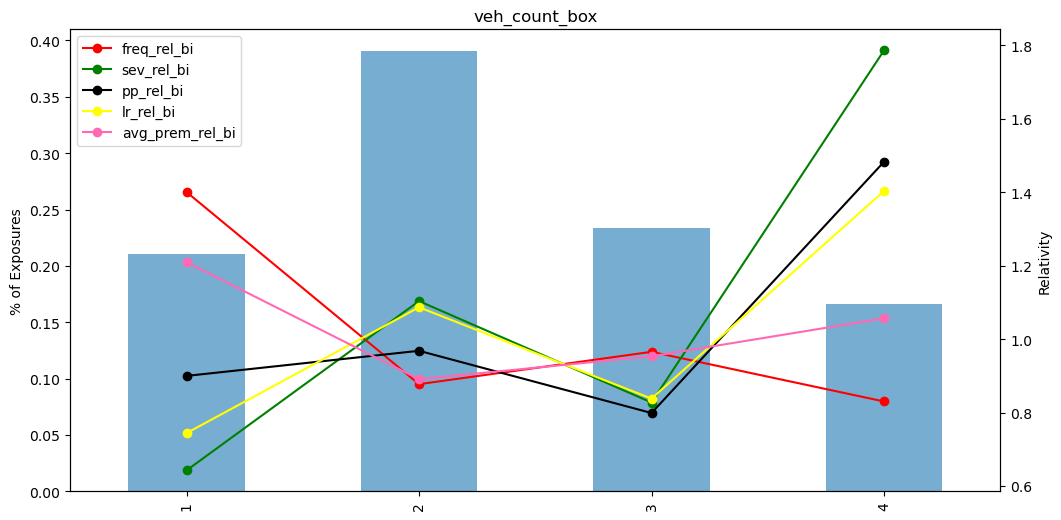

In [45]:
### Back to the chart and adding 2nd axis label
fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

cov = 'bi'
metrics = ['freq_rel_','sev_rel_','pp_rel_','lr_rel_','avg_prem_rel_'] ### Changed
colors = ['red','green','black','yellow','hotpink']

for i,m in enumerate(metrics):
    b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
ax2.set(ylabel='Relativity')

plt.show()

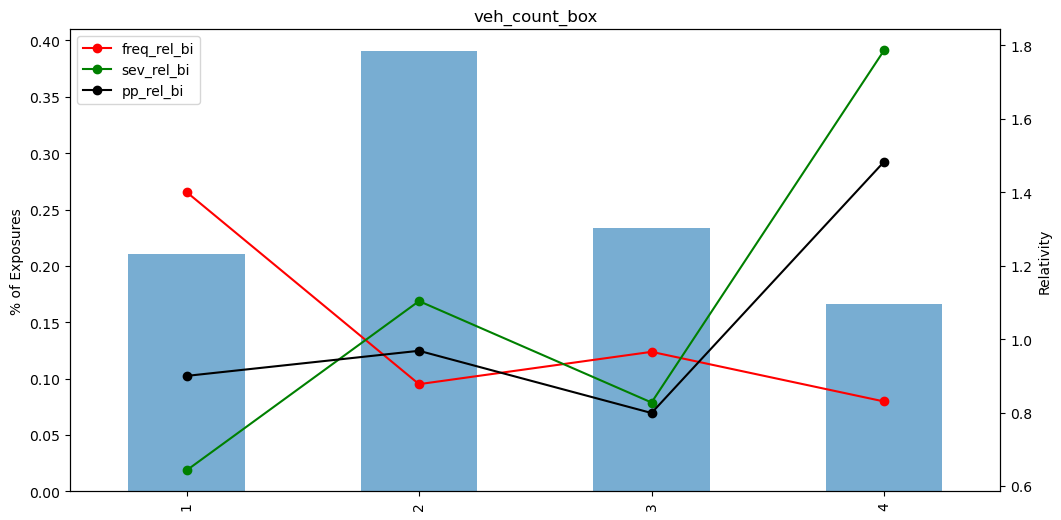

In [46]:
### Now, we see these relationships all at once
### Let's remove the premium and loss ratio and focus on freq, sev, pp

fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

cov = 'bi'
metrics = ['freq_rel_','sev_rel_','pp_rel_'] ### Changed
colors = ['red','green','black']

for i,m in enumerate(metrics):
    b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
ax2.set(ylabel='Relativity')

plt.show()

In [47]:
eda_table(data5,'veh_count_box')

,veh_count_box,ee_bi_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi
0,1,0.21,1.21,0.74,1.40,0.64,0.90
1,2,0.39,0.89,1.09,0.88,1.10,0.97
2,3,0.23,0.95,0.84,0.97,0.83,0.80
3,4,0.17,1.06,1.40,0.83,1.79,1.48


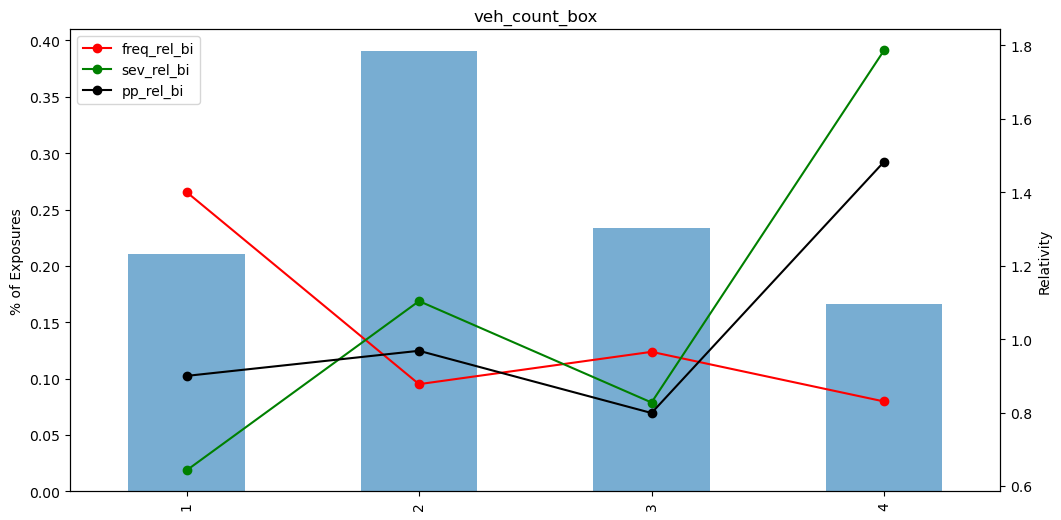

In [48]:
### Make a function out of this

# stuff for eda_table
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi']

# stuff for eda_plot_bi
cov = 'bi'
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot_bi(data,field):
    b = eda_table(data,field)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field]) ### Changed

    ax.set(ylabel='% of Exposures', title = field) ### Changed
    ax2.set(ylabel='Relativity')

    plt.show()
    
eda_plot_bi(data5,'veh_count_box')

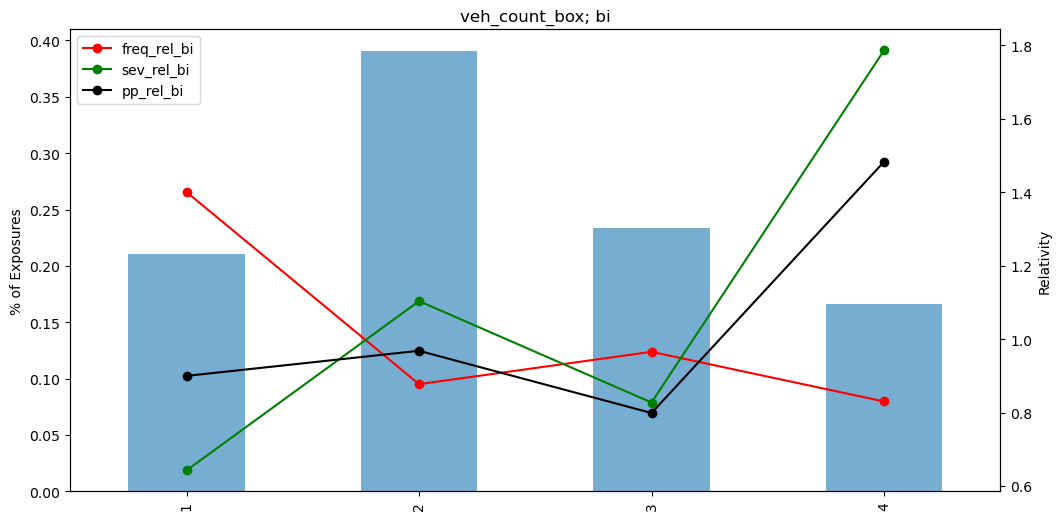

In [49]:
### Let's add the ability to choose coverage

# stuff for eda_table
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']

# stuff for eda_plot_bi
# cov = 'bi' # removed
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot(data,field,cov):
    b = eda_table(data,field)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6) ### Changed

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov) ### Changed
    ax2.set(ylabel='Relativity')

    plt.show()
    
eda_plot(data5,'veh_count_box','bi')

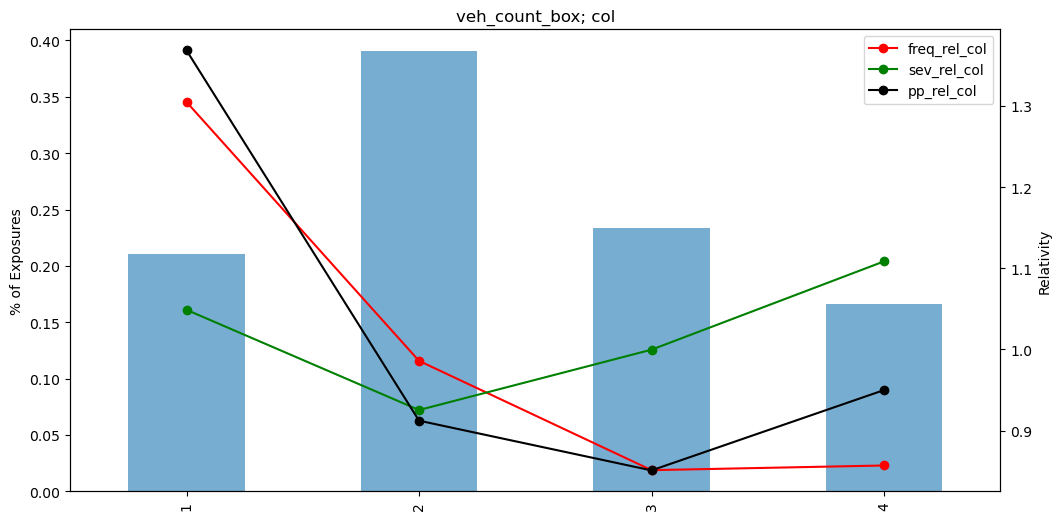

In [50]:
eda_plot(data5,'veh_count_box','col')

## Make a widget to create the chart and finish EDA

In [52]:
### Make widget for bodily injury coverage just to display the table first

### Need list of fields to analyze
fields = [i for i in data5.columns if i not in facts]
    
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(field):
    return eda_table(data5,field)

interact(f, field = fields)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'zip', 'pol_id', 'vi…

<function __main__.f(field)>

In [56]:
fields

['pol_eff_year',
 'modelyear',
 'zip',
 'pol_id',
 'vin_id',
 'credit',
 'commute_flag',
 'veh_count_box',
 'driver_count_box',
 'veh_age_box',
 'coll_symb_ntile',
 'limit_bi',
 'ded_coll',
 'DrvAge_box',
 'male',
 'single',
 'widowed',
 'Date',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'police_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag',
 'Total_Loss_US_flag',
 'Stolen_flag',
 'Severe_Frame_Damage_Prob_flag',
 'Airbag_Deploy

In [57]:
### Let's remove fields from the analysis list that we don't need

dont_need_list = ['zip', 'pol_id', 'vin_id','Date','error_current_ownership'] ### Added
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]
    
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(field):
    return eda_table(data5,field)

interact(f, field = fields)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

<function __main__.f(field)>

In [58]:
### Expand to use eda_plot()

### Don't need to import this everytime, just putting it here for easier copying and pasting for other use cases
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### eda_plot code
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot(data,field,cov):
    b = eda_table(data5,field)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov)
    ax2.set(ylabel='Relativity')

    plt.show()
    
### Widget code
dont_need_list = ['zip', 'pol_id', 'vin_id','Date']
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]

def f(field,cov): ### Changed
    return eda_plot(data5,field,cov) ### Changed

In [61]:
### Run widget

interact(f, field = fields, cov = covs)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

<function __main__.f(field, cov)>

In [63]:
### Fix large ranges by using pd.qcut

### Let's add a statement which determines what to show based on how big the dataframe is

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### eda_table code
def eda_table_final(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()
    
    ### Added
    if a.shape[0] > 40:
        a = data.groupby(pd.qcut(data[field], q = 25, precision = 1, duplicates='drop')).agg(agg_dict).reset_index() ### pd.qcut won't retain nan values so we will need to deal with those
    else:
        pass
    ### End Added
    
    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()
        
    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]
        
    a.drop(columns = facts, inplace = True)
    
    metrics = ['freq','sev','pp','lr','avg_prem']
    for c in covs:
        a['avg_prem_rel_' + c] = a['avg_prem_' + c]  /(data['ep_' + c].sum()      /data['ee_' + c].sum())
        a['lr_rel_' + c]       = a['lr_' + c]        /(data['incloss_' + c].sum() /data['ep_' + c].sum())
        a['freq_rel_' + c]     = a['freq_' + c]      /(data['cc_' + c].sum()      /data['ee_' + c].sum())
        a['sev_rel_' + c]      = a['sev_' + c]       /(data['incloss_' + c].sum() /data['cc_' + c].sum())
        a['pp_rel_' + c]       = a['pp_' + c]        /(data['incloss_' + c].sum() /data['ee_' + c].sum())
                                                                             
    for c in covs:
        for m in metrics:
            del a[m + '_' + c]
    
    return a

### eda_plot code
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot_final(data,field,cov): ### Changed
    b = eda_table_final(data5,field) ### Changed
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov)
    ax2.set(ylabel='Relativity')

    plt.show()
    
### Widget code
dont_need_list = ['zip', 'pol_id', 'vin_id','Date']
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]

def f(field,cov):
    return eda_plot_final(data5,field,cov) ### Changed

In [64]:
interact(f, field = fields, cov = covs)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

<function __main__.f(field, cov)>

In [65]:
### deal with nan values
### make a list of fields which have nan

nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)
        
nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'police_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag',
 'Total_Loss_US_flag',
 'Stolen_flag',
 'Severe_Frame_Damage_Prob_flag',
 'Airbag_Deployed_flag',
 'Nonbrand_Fire_flag',
 'Crash_Test_flag',
 'Salvage_Auction_flag',
 'Other_Severe_Problem_flag',
 'Failed_Emissions_flag',
 'Gross_Polluter_flag',
 'Nonsevere_Accident_flag',
 'Damage_flag',
 'Collision_Repair_Facility_fl

In [66]:
### looks like a lot of these are boolean - let's deal with all of them at once and convert to numeric flag for easier models later

eda_table(data5,'Lien_Holder')

### however the dtype isn't boolean, this was lost in the merge due to nan

,Lien_Holder,ee_bi_pct,ee_col_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi,avg_prem_rel_col,lr_rel_col,freq_rel_col,sev_rel_col,pp_rel_col
0,False,0.90,0.90,0.99,0.98,0.97,1.01,0.98,0.97,0.99,0.97,1.00,0.97
1,True,0.08,0.08,1.10,1.25,1.42,0.97,1.38,1.33,1.06,1.43,0.98,1.41
2,NaN,0.02,0.02,0.88,0.71,0.91,0.69,0.62,0.88,0.96,0.91,0.93,0.85


In [67]:
### how about something that inspects the data and if the unique levels are True, False, and/or NaN we do our conversion
### start with simple case

data5[(['Lien_Holder'])].drop_duplicates()['Lien_Holder'].to_list()

[False, True, None]

In [68]:
### let's put this all together
### our fields which contain 0,1 as options will also be returned with the function

match_list1 = [False, True, None]
match_list2 = [False, True]

boolean_list = []
for f in fields:
    lst = data5[([f])].drop_duplicates()[f].to_list()
    lst_len = len(lst)

    if (lst_len == 2) & (True in lst) & (False in lst):
        boolean_list.append(f)
    elif (len(lst) == 3) & (True in lst) & (False in lst) & (None in lst):
        boolean_list.append(f)
        
boolean_list

['commute_flag',
 'male',
 'single',
 'widowed',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag',
 'Total_Loss_US_flag',
 'Stolen_flag',
 'Severe_Frame_Damage_Prob_flag',
 'Airbag_Deployed_flag',
 'Nonbrand_Fire_flag',
 'Salvage_Auction_flag',
 'Other_Severe_Problem_flag',
 'Failed_Emissions_flag',
 'Gross_Polluter_flag',
 'Nonsevere_Accident_flag',
 'Damage_flag',
 'Collision_Repair_Facility_flag',
 'Potential_Frame_Damage_flag',
 'Potential_Damage_flag',
 'Odometer_Problem_flag',
 'EML_or_NAM_flag',
 'Rollback_flag',
 'Repossession_flag',
 'CPO_flag',
 'Safety_Failed_flag',

In [69]:
for b in boolean_list:
    data5[b] = np.where(data5[b] == True, 1, 0)
    data5[b] = data5[b].astype('uint8')

In [70]:
### run nan list again

nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)
        
nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'police_use_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Crash_Test_flag',
 'wtd_avg_travel_time',
 'diploma_ntile',
 'pop_density_ntile',
 'unemployment_ntile']

In [71]:
### next, let's fix the null values in our 4 geodemographic fields which we want to set at 50
### at this point let's bring in our functions from Lesson 2

def box_var(data, field, low, high, new_name = False):
    if new_name == False:
        data[field + '_box'] = np.where(data[field] <= low, low, np.where(data[field] >= high, high, data[field]))
    else:
        data[new_name] = np.where(data[field] <= low, low, np.where(data[field] >= high, high, data[field]))
        
def fillna(data, field, new_name, specific_value = False):
    if specific_value == False:
        data[new_name] = data[field].fillna(data[field].mode().values[0])
    else:
        data[new_name] = data[field].fillna(specific_value)

In [72]:
### let's go ahead and simply override the existing fields - we are working with a copy of the data so we can always compare to data4 if we have some problem

geos = ['wtd_avg_travel_time', 'diploma_ntile', 'pop_density_ntile', 'unemployment_ntile']

for g in geos:
    fillna(data5, g, g, specific_value = 50)

In [73]:
nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)
        
nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'police_use_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Crash_Test_flag']

In [74]:
### Crash_Test_flag & police_use_flag - why are they still here?

eda_table(data5,'Crash_Test_flag')

,Crash_Test_flag,ee_bi_pct,ee_col_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi,avg_prem_rel_col,lr_rel_col,freq_rel_col,sev_rel_col,pp_rel_col
0,False,0.98,0.98,1.00,1.01,1.00,1.01,1.01,1.00,1.00,1.00,1.00,1.00
1,NaN,0.02,0.02,0.88,0.71,0.91,0.69,0.62,0.88,0.96,0.91,0.93,0.85


In [75]:
eda_table(data5,'police_use_flag')

,police_use_flag,ee_bi_pct,ee_col_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi,avg_prem_rel_col,lr_rel_col,freq_rel_col,sev_rel_col,pp_rel_col
0,False,0.98,0.98,1.00,1.01,1.00,1.01,1.01,1.00,1.00,1.00,1.00,1.00
1,NaN,0.02,0.02,0.88,0.71,0.91,0.69,0.62,0.88,0.96,0.91,0.93,0.85


In [76]:
### looks like we need to simply remove them

del data5['Crash_Test_flag'], data5['police_use_flag']
fields.remove('Crash_Test_flag')
fields.remove('police_use_flag')

nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)
        
nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt']

In [77]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs)

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

<function __main__.f(field, cov)>

In [78]:
### for all remaining items, negative values imply missing
### let's turn any negative values into nan

for n in nan_list:
    data5[n] = np.where(data5[n] < 0, np.nan, data5[n])

In [79]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs)

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

<function __main__.f(field, cov)>

In [80]:
### let's round the mileage data to the nearest 1000 and current odometer to 10000

nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt']

In [81]:
miles_list = ['Modeled_Annual_Mileage', 'Annual_Mileage_Estimate']

for m in miles_list:
    data5[m] = round(data5[m]/1000,0)*1000
    
data5['Estimated_Current_Mileage'] = round(data5['Estimated_Current_Mileage']/10000,0)*10000

In [82]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs)

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

<function __main__.f(field, cov)>

In [83]:
### now let's apply some box logic

box_var(data5, 'Modeled_Annual_Mileage', 5000, 17000, new_name = 'Modeled_Annual_Mileage')
box_var(data5, 'Estimated_Current_Mileage', 10000, 200000, new_name = 'Estimated_Current_Mileage')
box_var(data5, 'Annual_Mileage_Estimate', 3000, 30000, new_name = 'Annual_Mileage_Estimate')
box_var(data5, 'Number_of_Titling_Transactions', 1, 6, new_name = 'Number_of_Titling_Transactions')
box_var(data5, 'LOO_years', 0, 12, new_name = 'LOO_years')
box_var(data5, 'curr_owner_odo_cnt', 0, 25, new_name = 'curr_owner_odo_cnt')
box_var(data5, 'all_owner_odo_cnt', 0, 40, new_name = 'all_owner_odo_cnt')

In [84]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs)

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

<function __main__.f(field, cov)>

In [85]:
### finally we need to fix those nan values
### let's use the mean but we also need to make a null flag for GLM purposes
### let's modify our fillna function to do this

def fillna_mean_with_flag(data, field):
    data[field + '_null_flag'] = np.where(data[field].isna() == True, 1, 0).astype('uint8')
    data[field] = data[field].fillna(data[field].mean())
    
for n in nan_list:
    fillna_mean_with_flag(data5, n)

In [86]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs)

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

<function __main__.f(field, cov)>

In [87]:
### Did we miss anything?  Let's look everything over

fields = [i for i in data5.columns if i not in facts and i not in ['zip','pol_id','vin_id','Date']]

def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

<function __main__.f(field, cov)>

In [88]:
### Looks like a lot of these have very low exposures in the cases of having 2 levels
### Let's create a simple print showing all 2 level fields and their corresponding lowest exposure % of the data

fields = [i for i in data5.columns if i not in facts and i not in ['zip','pol_id','vin_id','Date']]

### First, let's just be sure we always have at least 2 levels
for f in fields:
    a = data5.groupby([f]).agg({'ee_bi': 'sum'}).reset_index()
    if a.shape[0] < 2:
        print(f)

In [89]:
### Great, every field has at least 2 levels

for f in fields:
    a = data5.groupby([f]).agg({'ee_bi': 'sum'}).reset_index()
    if a.shape[0] == 2:
        a['ee_bi_pct'] = a['ee_bi']/a['ee_bi'].sum()
        
        min_bi_pct = a['ee_bi_pct'].min()
        
        print(f + '; ' + str(round(min_bi_pct,3)))

commute_flag; 0.451
male; 0.484
single; 0.3
widowed; 0.039
Lien_Holder; 0.076
current_ownership_personal; 0.196
current_ownership_lease; 0.093
current_ownership_corp_govt; 0.019
error_current_ownership; 0.064
personal_use_flag; 0.19
rental_use_flag; 0.068
taxi_use_flag; 0.0
comm_use_flag; 0.03
fleet_use_flag; 0.018
govt_use_flag; 0.001
nonprofit_use_flag; 0.0
corp_use_flag; 0.028
lease_flag; 0.237
Severe_Problem_flag; 0.029
Branded_Title_flag; 0.014
Branded_Title_Loss_flag; 0.01
Branded_Title_Odometer_flag; 0.004
Branded_Title_Lemon_flag; 0.001
Severe_Accident_flag; 0.015
Total_Loss_US_flag; 0.01
Stolen_flag; 0.003
Severe_Frame_Damage_Prob_flag; 0.002
Airbag_Deployed_flag; 0.007
Nonbrand_Fire_flag; 0.0
Salvage_Auction_flag; 0.001
Other_Severe_Problem_flag; 0.023
Failed_Emissions_flag; 0.016
Gross_Polluter_flag; 0.0
Nonsevere_Accident_flag; 0.194
Damage_flag; 0.062
Collision_Repair_Facility_flag; 0.018
Potential_Frame_Damage_flag; 0.002
Potential_Damage_flag; 0.249
Odometer_Problem_flag

In [90]:
### Let's set an exposure threshold of at least 1% of the data
### If the lowest % of total exposures is < .01, let's eliminate that from our dataset

remove_list = []
for f in fields:
    a = data5.groupby([f]).agg({'ee_bi': 'sum'}).reset_index()
    if a.shape[0] == 2:
        a['ee_bi_pct'] = a['ee_bi']/a['ee_bi'].sum()
        
        min_bi_pct = a['ee_bi_pct'].min()
        
        if min_bi_pct < .01:
            remove_list.append(f)

for r in remove_list:
    del data5[r]
    fields.remove(r)
    print(r)

taxi_use_flag
govt_use_flag
nonprofit_use_flag
Branded_Title_Odometer_flag
Branded_Title_Lemon_flag
Total_Loss_US_flag
Stolen_flag
Severe_Frame_Damage_Prob_flag
Airbag_Deployed_flag
Nonbrand_Fire_flag
Salvage_Auction_flag
Gross_Polluter_flag
Potential_Frame_Damage_flag
EML_or_NAM_flag
Rollback_flag
Safety_Failed_flag
Recycler_Inv_flag
Scrapped_flag


In [91]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

<function __main__.f(field, cov)>

In [92]:
### Final modifications

box_var(data5, 'credit', 1, 10, new_name = 'credit')
box_var(data5, 'limit_bi', 50, 500, new_name = 'limit_bi')

del data5['error_current_ownership']
fields.remove('error_current_ownership')

In [59]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'credit', 'commute_flag', 'veh_co…

<function __main__.f(field, cov)>

In [93]:
data5[(fields)].corr()

,pol_eff_year,modelyear,credit,commute_flag,veh_count_box,driver_count_box,veh_age_box,coll_symb_ntile,limit_bi,ded_coll,DrvAge_box,male,...,wtd_avg_travel_time,diploma_ntile,pop_density_ntile,unemployment_ntile,modelyear_null_flag,Modeled_Annual_Mileage_null_flag,Estimated_Current_Mileage_null_flag,Annual_Mileage_Estimate_null_flag,Number_of_Titling_Transactions_null_flag,LOO_years_null_flag,curr_owner_odo_cnt_null_flag,all_owner_odo_cnt_null_flag
pol_eff_year,1.00,0.25,-0.04,0.02,0.00,0.01,-0.01,0.03,0.01,0.02,0.03,-0.00,...,-0.01,-0.01,0.03,0.01,-0.00,-0.04,-0.05,-0.05,-0.03,-0.03,-0.04,-0.04
modelyear,0.25,1.00,0.06,0.09,-0.08,0.03,-0.92,0.04,0.06,0.08,-0.06,0.00,...,0.01,-0.04,0.05,0.03,-0.00,-0.03,-0.24,0.04,0.16,0.16,-0.03,-0.03
credit,-0.04,0.06,1.00,0.09,-0.07,-0.01,-0.07,0.04,-0.20,0.09,-0.31,-0.02,...,-0.03,-0.01,0.04,-0.02,0.00,0.01,-0.07,0.09,0.01,0.01,0.01,0.01
commute_flag,0.02,0.09,0.09,1.00,-0.06,0.05,-0.08,0.00,-0.04,0.04,-0.21,-0.01,...,-0.01,-0.05,0.08,-0.03,-0.03,-0.03,-0.07,-0.06,-0.02,-0.02,-0.04,-0.04
veh_count_box,0.00,-0.08,-0.07,-0.06,1.00,0.64,0.07,0.06,0.09,0.07,-0.15,0.06,...,0.02,0.06,-0.11,0.04,0.00,0.01,0.08,0.06,0.01,0.01,0.01,0.01
driver_count_box,0.01,0.03,-0.01,0.05,0.64,1.00,-0.03,0.02,0.11,0.11,-0.23,0.03,...,0.00,0.01,-0.04,0.04,-0.02,-0.02,-0.02,-0.00,-0.01,-0.01,-0.01,-0.01
veh_age_box,-0.01,-0.92,-0.07,-0.08,0.07,-0.03,1.00,-0.02,-0.07,-0.08,0.05,-0.00,...,-0.01,0.04,-0.04,-0.03,0.19,0.16,0.25,-0.05,-0.12,-0.12,0.16,0.16
coll_symb_ntile,0.03,0.04,0.04,0.00,0.06,0.02,-0.02,1.00,0.04,0.08,-0.06,0.03,...,-0.01,-0.01,0.02,0.01,-0.00,-0.01,0.01,0.02,0.03,0.03,-0.01,-0.01
limit_bi,0.01,0.06,-0.20,-0.04,0.09,0.11,-0.07,0.04,1.00,0.07,0.08,0.01,...,-0.00,-0.05,0.01,-0.03,0.00,0.00,-0.01,-0.04,0.02,0.02,0.00,0.00
ded_coll,0.02,0.08,0.09,0.04,0.07,0.11,-0.08,0.08,0.07,1.00,-0.15,0.02,...,0.01,-0.04,0.03,-0.03,-0.01,-0.00,-0.04,0.01,0.01,0.01,-0.00,-0.00


### Lesson 3 Exercise 1
#### Modify the widget so that the chart displays % of Exposures, Avg Premium Relativity, and Loss Ratio Relativity
#### This requires changing one or more of the items within the block of code where eda_table_final & eda_plot_final are created so that the functions give you the output you want

In [94]:
### Fix large ranges by using pd.qcut

### Let's add a statement which determines what to show based on how big the dataframe is

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### eda_table code
def eda_table_final(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()
    
    ### Added
    if a.shape[0] > 40:
        a = data.groupby(pd.qcut(data[field], q = 25, precision = 1, duplicates='drop')).agg(agg_dict).reset_index() ### pd.qcut won't retain nan values so we will need to deal with those
    else:
        pass
    ### End Added
    
    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()
        
    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]
        
    a.drop(columns = facts, inplace = True)
    
    metrics = ['freq','sev','pp','lr','avg_prem']
    for c in covs:
        a['avg_prem_rel_' + c] = a['avg_prem_' + c]  /(data['ep_' + c].sum()      /data['ee_' + c].sum())
        a['lr_rel_' + c]       = a['lr_' + c]        /(data['incloss_' + c].sum() /data['ep_' + c].sum())
        a['freq_rel_' + c]     = a['freq_' + c]      /(data['cc_' + c].sum()      /data['ee_' + c].sum())
        a['sev_rel_' + c]      = a['sev_' + c]       /(data['incloss_' + c].sum() /data['cc_' + c].sum())
        a['pp_rel_' + c]       = a['pp_' + c]        /(data['incloss_' + c].sum() /data['ee_' + c].sum())
                                                                             
    for c in covs:
        for m in metrics:
            del a[m + '_' + c]
    
    return a

### eda_plot code
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']
metrics = ['avg_prem_rel_','lr_rel_'] # Changed for exercise
colors = ['red','green','black']

def eda_plot_final(data,field,cov): ### Changed
    b = eda_table_final(data5,field) ### Changed
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov)
    ax2.set(ylabel='Relativity')

    plt.show()
    
### Widget code
dont_need_list = ['zip', 'pol_id', 'vin_id','Date']
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]

def f(field,cov):
    return eda_plot_final(data5,field,cov) ### Changed

In [95]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs)

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

<function __main__.f(field, cov)>